<a href="https://colab.research.google.com/github/georgeragan/BREAST-CANCER/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#importing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

LOADING THE DATASETS

In [33]:
dataset=sklearn.datasets.load_breast_cancer()

In [34]:
print(dataset)
#0 = M
#1 = B

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [78]:
print(dataset.data[0])
print(dataset.target[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


In [79]:
print(dataset.data[19])
print(dataset.target[19])

[1.354e+01 1.436e+01 8.746e+01 5.663e+02 9.779e-02 8.129e-02 6.664e-02
 4.781e-02 1.885e-01 5.766e-02 2.699e-01 7.886e-01 2.058e+00 2.356e+01
 8.462e-03 1.460e-02 2.387e-02 1.315e-02 1.980e-02 2.300e-03 1.511e+01
 1.926e+01 9.970e+01 7.112e+02 1.440e-01 1.773e-01 2.390e-01 1.288e-01
 2.977e-01 7.259e-02]
1


CONVERTING TO DATAFRAME

In [35]:
data=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [36]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
data["label"]=dataset.target

In [38]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


CHECKING SHAPE,NULL AND INFO AND COUNTS OF DATASETS
`

In [39]:
data.shape

(569, 31)

In [40]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [41]:
data["label"].value_counts()


label
1    357
0    212
Name: count, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

SPLITTING THE DATA

In [43]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

NORMALISING THE DATA

In [46]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [47]:
import tensorflow as tf
tf.random.set_seed(3) #to get accuracy same each time you run
from tensorflow import keras #helps in easy creation of neural network

ARCHITECTURE OF NEURAL NETWORK

In [48]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),#CONVERTS DATA INTO SINGLE DIMENSIONAL ARRAY
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")
])

COMPILING OF NEURAL NETWORK

In [49]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", #TARGET IS 0,1,2 ETC USE THIS ONE
              metrics=["accuracy"])

TRAINING OF NEURAL NETWORK

FINDING THE ACCURACY FOR TRAINING DATA


In [50]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)
#loss=truevalue-predicted value

Epoch 1/10
13/13 [==============================] - 2s 32ms/step - loss: 0.9477 - accuracy: 0.3985 - val_loss: 0.8889 - val_accuracy: 0.3696
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6751 - accuracy: 0.4866 - val_loss: 0.6548 - val_accuracy: 0.4130
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5174 - accuracy: 0.6112 - val_loss: 0.5169 - val_accuracy: 0.6304
Epoch 4/10
13/13 [==============================] - 0s 14ms/step - loss: 0.4271 - accuracy: 0.7653 - val_loss: 0.4255 - val_accuracy: 0.8913
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 0.3609 - accuracy: 0.8875 - val_loss: 0.3621 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 15ms/step - loss: 0.3118 - accuracy: 0.9364 - val_loss: 0.3123 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 23ms/step - loss: 0.2703 - accuracy: 0.9487 - val_loss: 0.2699 - val_accuracy: 0.9565
Epoch 8/10
13

PLOTTING THE DATA

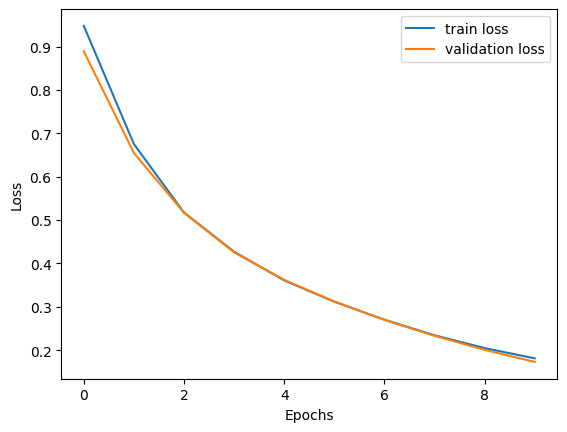

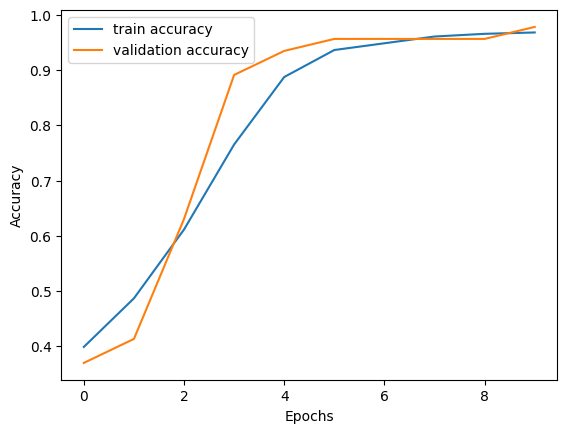

In [57]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

ACCURACY ON TEST DATA

In [58]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.1625 - accuracy: 0.9649
Test Accuracy = 0.9649122953414917


PREDICTIVE SYSTEM

In [60]:
print(x_test.shape)
print(x_test[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [62]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [65]:
print(y_pred.shape)
print(y_pred[0])
#Here we are predicting the probaliity,not actual 1 or 0 like in case of ML.
#IN ML WE HAVE CLASSIFICATION MODELS BUT IN DEEP LEARNING WE DONT HAVE SO WE SHOULD FIRST LOOK INTO PROBABILITY THE CONVERT USING ARGMAX FUNCTION
#1ST VALUE REPRESENTS PROBABILITY OF LABEL 0 AND SECOND VALUE REPRESENTS PROBABILITY OF LABEL 1
#IF 1ST VALUE IS MAX LABLE =0.SECOND VALUE MAX LABLE = 1


(114, 2)
[0.55455023 0.8045143 ]


CONVERTING PREDICTION PROBABILTY INTO LABELS

In [66]:
y_pred_lables=[np.argmax(i) for i in y_pred]

In [70]:
y_pred_lables[1:10]

[1, 1, 0, 1, 0, 1, 1, 1, 1]

BUILDING THE PREDICTIVE SYSTEM

In [74]:
input_data=(1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

input_data_std=sc.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

prediction_label=[np.argmax(prediction)]

print(prediction_label)

if(prediction_label[0]==0):
  print("The tumor is Malignant")
else:
  print("The tumor is Benign")

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]
[0]
The tumor is Malignant
